In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [23]:
df=pd.read_csv("C:/Users/saisi/Downloads/archive (4).zip")
df.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [24]:
df.shape

(150, 5)

In [25]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [26]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [27]:
data = df.groupby("species")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [28]:
df['species'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x1db2ab7ba10>,
 'caps': [<matplotlib.lines.Line2D at 0x1db2ab84990>,
 'boxes': [<matplotlib.lines.Line2D at 0x1db2ab7afd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1db2ab85f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1db2ab866d0>],
 'means': []}

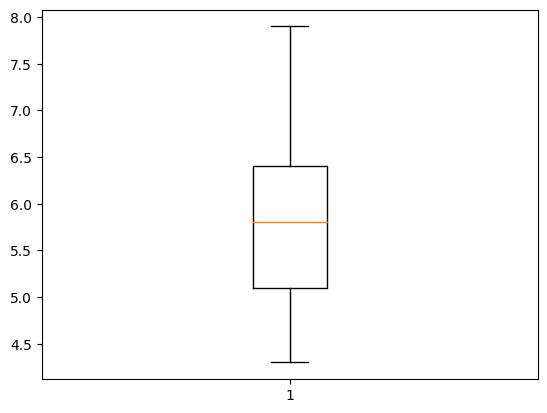

In [30]:
plt.boxplot(df['sepal_length'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1db2a7b09d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1db2aa41550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1db2aac5190>],
 'medians': [<matplotlib.lines.Line2D at 0x1db2aa42010>],
 'fliers': [<matplotlib.lines.Line2D at 0x1db2a7b0790>],
 'means': []}

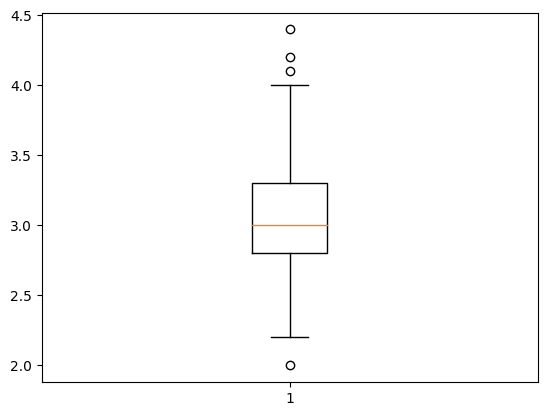

In [31]:
plt.boxplot(df['sepal_width'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1db2aa9bd10>,
 'caps': [<matplotlib.lines.Line2D at 0x1db2aa45890>,
 'boxes': [<matplotlib.lines.Line2D at 0x1db2aa98950>],
 'medians': [<matplotlib.lines.Line2D at 0x1db2a8d7490>],
 'fliers': [<matplotlib.lines.Line2D at 0x1db2aa45810>],
 'means': []}

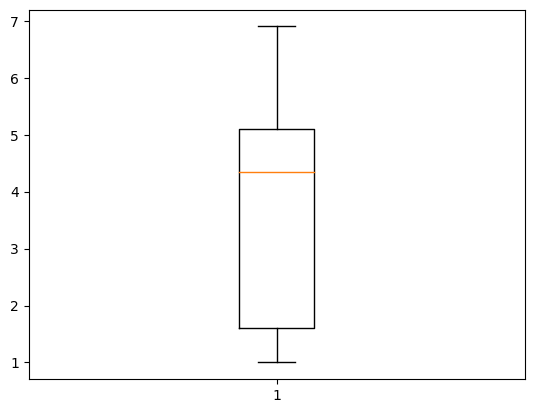

In [32]:
plt.boxplot(df['petal_length'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1db2ac06190>,
 'caps': [<matplotlib.lines.Line2D at 0x1db2ac07890>,
 'boxes': [<matplotlib.lines.Line2D at 0x1db2ac05550>],
 'medians': [<matplotlib.lines.Line2D at 0x1db2ac10dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1db2ac074d0>],
 'means': []}

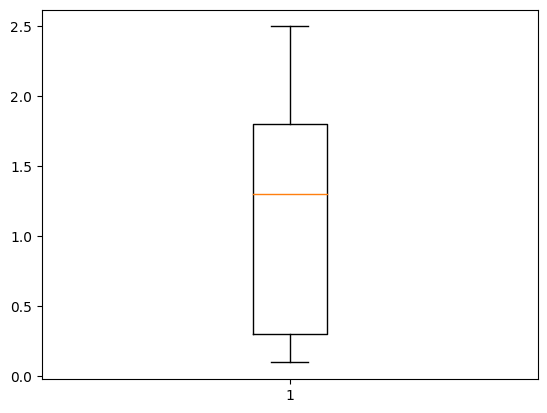

In [33]:
plt.boxplot(df['petal_width'])

In [34]:
X=df.iloc[:,0:4]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
y=df.iloc[:,4]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [36]:
x_train,x_test ,y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [37]:
model=LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [38]:
model.score(X,y)

0.9733333333333334

In [39]:
model.coef_

array([[-0.42332676,  0.96165415, -2.51936081, -1.08617251],
       [ 0.53399659, -0.31779928, -0.20535156, -0.93952955],
       [-0.11066983, -0.64385487,  2.72471237,  2.02570206]])

In [40]:
model.intercept_

array([  9.88069427,   2.21934594, -12.10004021])

In [ ]:
y_pred=model.predict(x_test)